# CHAPTER-5  (FINITE IMPULSE RESPONSE FILTER)

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install Scipy

Note: you may need to restart the kernel to use updated packages.


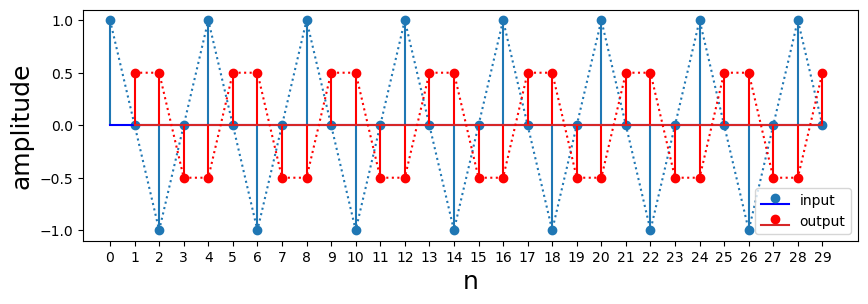

In [6]:
#5.1
import matplotlib.pyplot as plt
from scipy import signal 
Ns=30 # length of input sequence
n= np.arange(Ns) # sample index
x = np.cos(np.arange(Ns)*np.pi/2.)
y= signal.lfilter([1/2.,1/2.],1,x)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,3)

ax.stem(n,x,label='input',basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[1:],y[:-1],markerfmt='ro',linefmt='r-',label='output')
ax.plot(n[1:],y[:-1],'r:')
ax.set_xlim(xmin=-1.1)
ax.set_ylim(ymin=-1.1,ymax=1.1)
ax.set_xlabel("n",fontsize=18)
ax.legend(loc=0)
ax.set_xticks(n)
ax.set_ylabel("amplitude",fontsize=18);


C:\Users\HP\AppData\Local\Temp\ipykernel_18964\3939052382.py:14: RuntimeWarning: divide by zero encountered in log10
  ax.plot(w,20*np.log10(abs(h)))


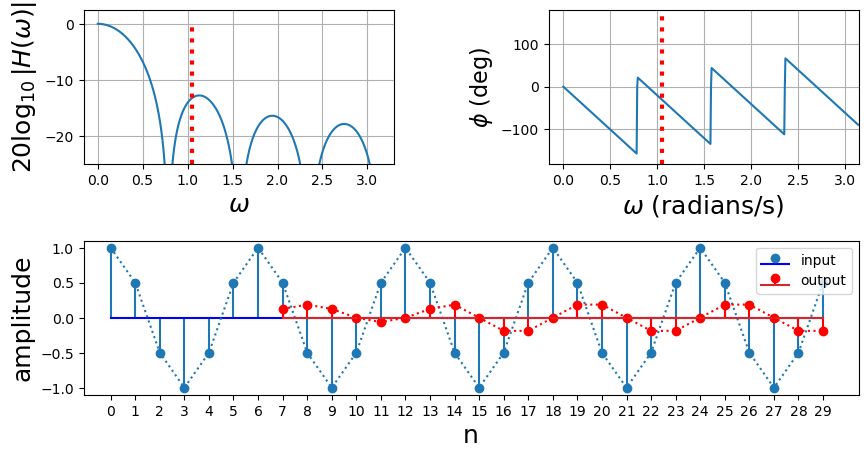

In [7]:
#5.2
from matplotlib import gridspec

fig=plt.figure()
fig.set_size_inches((10,5))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

ax = fig.add_subplot(plt.subplot(gs[0,0]))

ma_length = 8 # moving average filter length
w,h=signal.freqz(np.ones(ma_length)/ma_length,1)
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
ax.vlines(np.pi/3,-25,0,linestyles=':',color='r',lw=3.)
ax.set_ylim(ymin=-25)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=180)
ax.vlines(np.pi/3,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[1,:]))
Ns=30
n= np.arange(Ns)
x = np.cos(np.arange(Ns)*np.pi/3.)
y= signal.lfilter(np.ones(ma_length)/ma_length,1,x)

ax.stem(n,x,label='input',basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[ma_length-1:],y[:-ma_length+1],markerfmt='ro',linefmt='r-',label='output')
ax.plot(n[ma_length-1:],y[:-ma_length+1],'r:')
ax.set_xlim(xmin=-1.1)
ax.set_ylim(ymin=-1.1,ymax=1.1)
ax.set_xlabel("n",fontsize=18)
ax.set_xticks(n)
ax.legend(loc=0)
ax.set_ylabel("amplitude",fontsize=18);

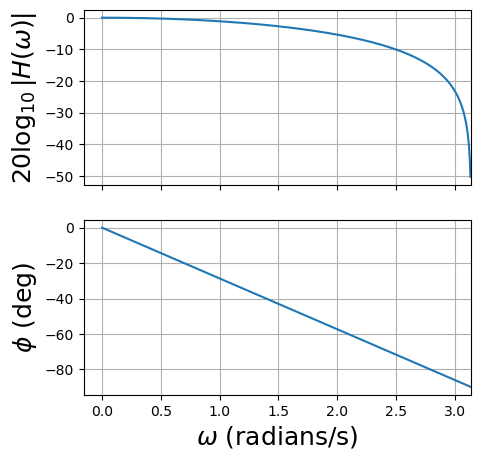

In [8]:
#5.3
from __future__ import division
from scipy import signal 

fig, axs = plt.subplots(2,1,sharex=True)
#subplots_adjust( hspace = .2 )
fig.set_size_inches((5,5))

ax=axs[0]
w,h=signal.freqz([1/2., 1/2.],1) # Compute impulse response
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$20 \log_{10} |H(\omega)| $",fontsize=18)
ax.grid()

ax=axs[1]
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=18)
ax.set_xlim(xmax =np.pi)
ax.grid()

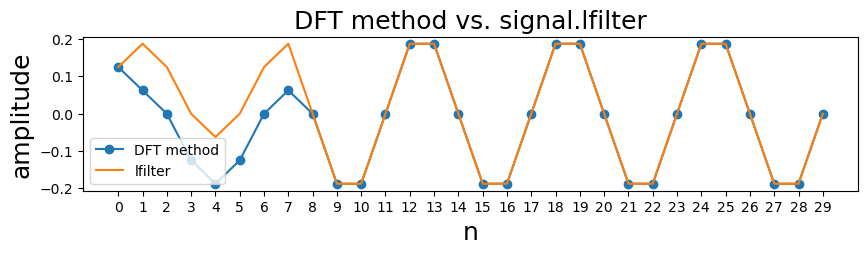

In [9]:
#5.4
h=np.ones(ma_length)/ma_length # filter sequence
yc=np.fft.ifft(np.fft.fft(h,len(x)+len(h)-1)*np.conj(np.fft.fft(x,len(x)+len(h)-1))).real

fig,ax=plt.subplots()
fig.set_size_inches((10,2))
ax.plot(n,yc[ma_length-1:],'o-',label='DFT method')
ax.plot(n,y,label='lfilter')
ax.set_title('DFT method vs. signal.lfilter',fontsize=18)
ax.set_xlabel('n',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
ax.legend(loc=0)
ax.set_xticks(n);


Text(0, 0.5, '$20\\log_{10}|H(\\omega)| $')

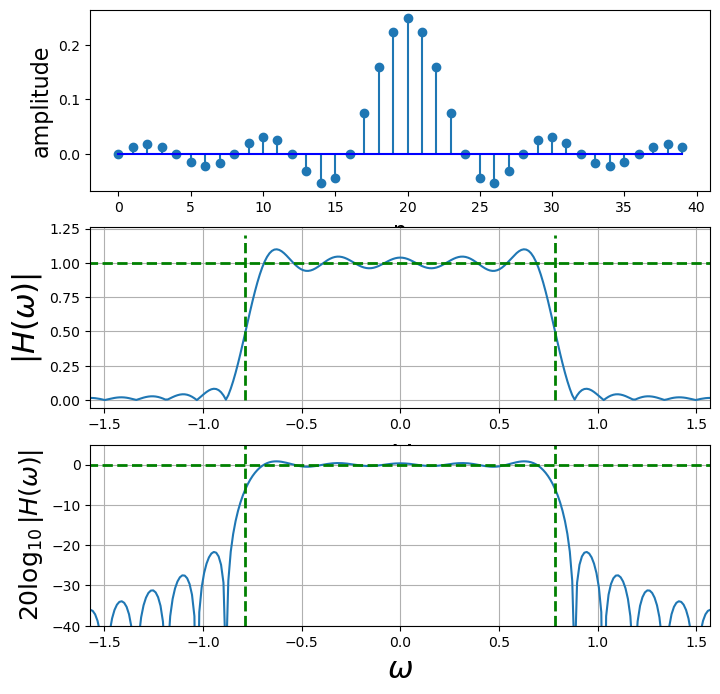

In [10]:
#5.5
# omega_c = pi/4

from __future__ import  division
from scipy import signal

wc = np.pi/4
M=20
N = 512 # DFT size
n = np.arange(-M,M)
h = wc/np.pi * np.sinc(wc*(n)/np.pi)  # see definition of np.sinc()

w,Hh = signal.freqz(h,1,whole=True, worN=N) # get entire frequency domain
wx = np.fft.fftfreq(len(w)) # shift to center for plotting

fig,axs = plt.subplots(3,1)
fig.set_size_inches((8,8))
#subplots_adjust(hspace=0.3)

ax=axs[0]
ax.stem(n+M,h,basefmt='b-')
ax.set_xlabel("n",fontsize=16)
ax.set_ylabel("amplitude",fontsize=16)

ax=axs[1]
ax.plot(w-np.pi,abs(np.fft.fftshift(Hh)))
ax.axis(xmax=np.pi/2,xmin=(-1 * np.pi)/2)
ax.vlines([-wc,wc],0,1.2,color='g',lw=2.,linestyle='--',)
ax.hlines(1,-np.pi,np.pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$|H(\omega)| $",fontsize=22)
ax.grid()

ax=axs[2]
ax.plot(w-(1*np.pi),20*np.log10(abs(np.fft.fftshift(Hh))))
ax.axis(ymin=-40,xmax=np.pi/2,xmin= (-1 * np.pi)/2)
ax.vlines([-wc,wc],10,-40,color='g',lw=2.,linestyle='--',)
ax.hlines(0,-1*np.pi,np.pi,color='g',lw=2.,linestyle='--',)
ax.grid()
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$20\log_{10}|H(\omega)| $",fontsize=18)

Text(20, 0, 'Gibbs phenomenon')

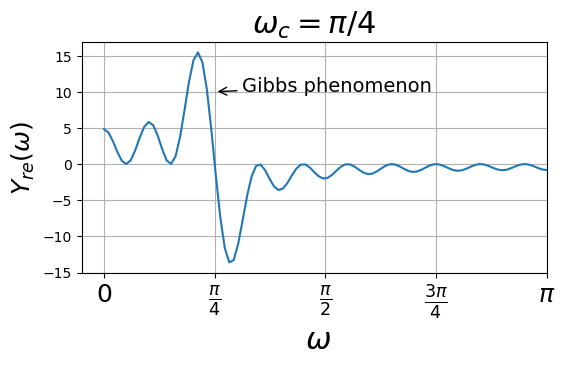

In [11]:
#5.6
fig,ax = plt.subplots()
fig.set_size_inches(6,3)

k=np.arange(M)
omega = np.linspace(0,np.pi,100)

ax.plot(omega,(np.sin(k*omega[:,None]+k*wc)-np.sin(k*omega[:,None]-k*wc)).sum(axis=1))
ax.set_ylabel(r"$Y_{re}(\omega)$",fontsize=18)
ax.grid()
ax.set_title(r"$\omega_c = \pi/4$",fontsize=22)
ax.set_xlabel(r" $\omega $",fontsize=22)
ax.set_xticks([0, np.pi/4,np.pi/2.,3*np.pi/4, np.pi,])
ax.set_xticklabels(['$0$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$', r'$\pi$'],fontsize=18)
ax.set_xlim(xmax=np.pi)
ax.annotate("Gibbs phenomenon",xy=(np.pi/4,10),fontsize=14,
            xytext=(20,0),
            textcoords='offset points',
            arrowprops={'facecolor':'b','arrowstyle':'->'})


Text(0, 0.5, '$20\\log_{10}|H(\\omega)| $')

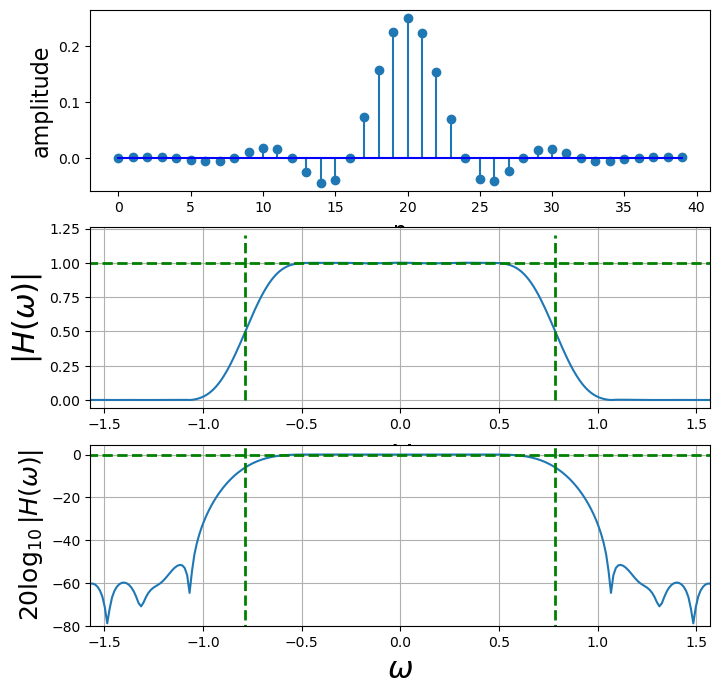

In [13]:
#5.7
wc = np.pi/4

M=20

N = 512 # DFT size
n = np.arange(-M,M)
win = signal.hamming(len(n))
h = wc/np.pi * np.sinc(wc*(n)/np.pi)*win  # see definition of np.sinc()

w,Hh = signal.freqz(h,1,whole=True, worN=N) # get entire frequency domain
wx = np.fft.fftfreq(len(w)) # shift to center for plotting

fig,axs = plt.subplots(3,1)
fig.set_size_inches((8,8))
#subplots_adjust(hspace=0.3)

ax=axs[0]
ax.stem(n+M,h,basefmt='b-')
ax.set_xlabel("n",fontsize=16)
ax.set_ylabel("amplitude",fontsize=16)

ax=axs[1]
ax.plot(w+(-1*np.pi),abs(np.fft.fftshift(Hh)))
ax.axis(xmax=np.pi/2,xmin=(-1*np.pi)/2)
ax.vlines([-wc,wc],0,1.2,color='g',lw=2.,linestyle='--',)
ax.hlines(1,-1*np.pi,np.pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$|H(\omega)| $",fontsize=22)
ax.grid()

ax=axs[2]
ax.plot(w+(-1*np.pi),20*np.log10(abs(np.fft.fftshift(Hh))))
ax.axis(ymin=-80,xmax=np.pi/2,xmin=(-1*np.pi)/2)
ax.vlines([-wc,wc],10,-80,color='g',lw=2.,linestyle='--',)
ax.hlines(0,(-1*np.pi),np.pi,color='g',lw=2.,linestyle='--',)
ax.grid()
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$20\log_{10}|H(\omega)| $",fontsize=18)

C:\Users\HP\AppData\Local\Temp\ipykernel_18964\2543689072.py:11: DeprecationWarning: Please use `kaiserord` from the `scipy.signal` namespace, the `scipy.signal.fir_filter_design` namespace is deprecated.
  M,beta= signal.fir_filter_design.kaiserord(delta, (fstop-fpass)/(fs/2.))
C:\Users\HP\AppData\Local\Temp\ipykernel_18964\2543689072.py:13: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  hn = signal.firwin(M,(fstop+fpass)/2.,window=('kaiser',beta),nyq=fs/2.)


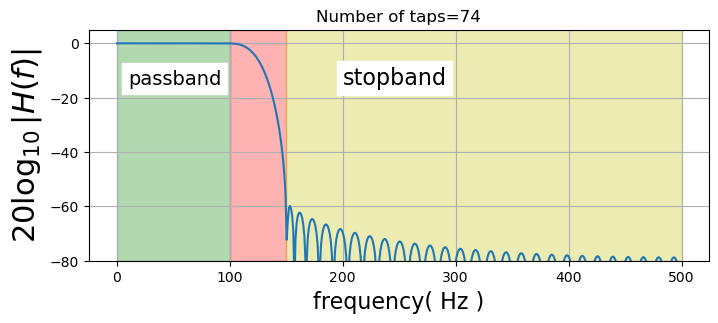

In [14]:
#5.8
Ns =300 # number of samples 
N = 1024 # DFT size

fs = 1e3 # sample rate in Hz
fpass = 100 # in Hz
fstop = 150 # in Hz
delta = 60 # in dB, desired attenuation in stopband
from matplotlib.patches import Rectangle
from scipy import signal
M,beta= signal.fir_filter_design.kaiserord(delta, (fstop-fpass)/(fs/2.))

hn = signal.firwin(M,(fstop+fpass)/2.,window=('kaiser',beta),nyq=fs/2.)
w,H = signal.freqz(hn) # frequency response

fig,ax = plt.subplots()
fig.set_size_inches((8,3))

ax.plot(w/np.pi*fs/2.,20*np.log10(abs(H)))
ax.set_xlabel("frequency( Hz )",fontsize=16)
ax.set_ylabel(r"$20\log_{10} |H(f)| $",fontsize=22)
ymin,ymax = -80,5
ax.axis(ymin = ymin,ymax=ymax)
ax.add_patch(Rectangle((0,ymin),width=fpass,height=ymax-ymin,color='g',alpha=0.3))
ax.add_patch(Rectangle((fpass,ymin),width=fstop-fpass,height=ymax-ymin,color='r',alpha=0.3))
ax.add_patch(Rectangle((fstop,ymin),width=fs/2-fstop,height=ymax-ymin,color='y',alpha=0.3))
ax.set_title("Number of taps=%d"%M)
ax.text(10,-15,'passband',fontsize=14,bbox=dict(color='white'))
ax.text(200,-15,'stopband',fontsize=16,bbox=dict(color='white'))
ax.grid()

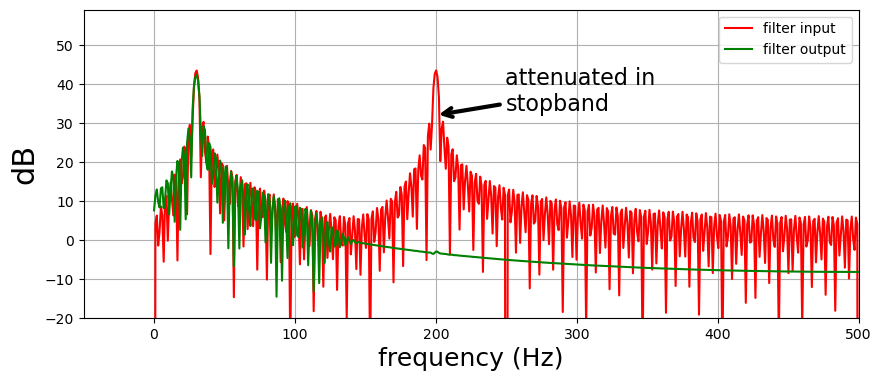

In [15]:
#5.9
t = np.arange(0,Ns)/fs
x = np.cos(2*np.pi*30*t)+np.cos(2*np.pi*200*t)
X = np.fft.fft(x,N)

y=signal.lfilter(hn,1,x)
Y = np.fft.fft(y,N)

fig,ax = plt.subplots()
fig.set_size_inches((10,4))
ax.plot(np.arange(N)/N*fs,20*np.log10(abs(X)),'r-',label='filter input')
ax.plot(np.arange(N)/N*fs,20*np.log10(abs(Y)),'g-',label='filter output')
ax.set_xlim(xmax = fs/2)
ax.set_ylim(ymin=-20)
ax.set_ylabel(r'dB',fontsize=22)
ax.set_xlabel("frequency (Hz)",fontsize=18)
ax.grid()
ax.annotate('attenuated in\nstopband',fontsize=16,xy=(200,32),
             xytext=(50,3),textcoords='offset points',
             arrowprops=dict(arrowstyle='->',lw=3),
            )
ax.legend(loc=0);

C:\Users\HP\AppData\Local\Temp\ipykernel_18964\2226657704.py:9: DeprecationWarning: 'remez' keyword argument 'Hz' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  hn = signal.remez(M,


Text(0.5, 1.0, '20-tap Parks-McClellan Filter')

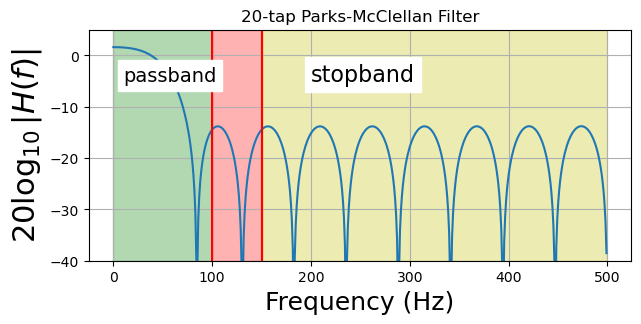

In [18]:
#5.10
import numpy as np
from matplotlib.patches import Rectangle
from scipy import signal
fs = 1e3 # sample rate in Hz
M = 20
fpass = 100 # in Hz
fstop = 150 # in Hz
hn = signal.remez(M,
                  np.array([0, fpass, fstop, fs])/2., # scaled passband, and stopband 
                  [1,0], # low pass filter
                  Hz = fs, # sampling frequency
                 )

w,H=signal.freqz(hn,1) # frequency response
def apply_plot_overlay():
    'convenience function to illustrate stop/passband in frequency response plot'
    ax.plot(w/np.pi*(fs/2),20*np.log10(abs(H)),label='Filter response')
    ax.set_ylim(ymax=5)
    ax.vlines(100,*ax.get_ylim(),color='r')
    ax.vlines(150,*ax.get_ylim(),color='r')
    ax.set_ylim(ymin=-40)
    ax.set_xlabel("Frequency (Hz)",fontsize=18)
    ax.set_ylabel(r"$20\log_{10}|H(f)|$",fontsize=22)
    ax.add_patch(Rectangle((0,-40),width=fpass,height=45,color='g',alpha=0.3))
    ax.add_patch(Rectangle((fpass,-40),width=fstop-fpass,height=45,color='r',
    alpha=0.3))
    ax.add_patch(Rectangle((fstop,-40),width=fs/2-fstop,height=45,color='y',
    alpha=0.3))
    ax.text(10,-5,'passband',fontsize=14,bbox=dict(color='white'))
    ax.text(200,-5,'stopband',fontsize=16,bbox=dict(color='white'))
    ax.grid()
fig,ax = plt.subplots()
fig.set_size_inches((7,3))
apply_plot_overlay()
ax.set_title('%d-tap Parks-McClellan Filter'%M)

C:\Users\HP\AppData\Local\Temp\ipykernel_18964\3882328406.py:3: DeprecationWarning: 'remez' keyword argument 'Hz' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  hn = signal.remez(M,


Text(0.5, 1.0, '40-tap Parks-McClellan Filter')

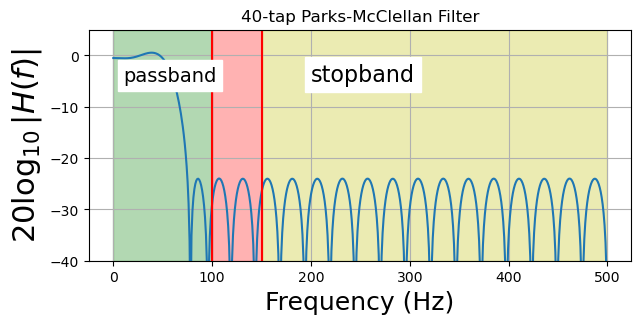

In [19]:
#5.11
M = 40 # double filter length
hn = signal.remez(M,
                  np.array([0, fpass, fstop, fs])/2., # scaled passband, and stopband
                  [1,0], # low pass filter
                  Hz = fs, # sampling frequency
                 )
w,H=signal.freqz(hn,1) # frequency response
fig,ax = plt.subplots()
fig.set_size_inches((7,3))
apply_plot_overlay()
ax.set_title('%d-tap Parks-McClellan Filter'%M)

C:\Users\HP\AppData\Local\Temp\ipykernel_18964\3383393440.py:6: DeprecationWarning: 'remez' keyword argument 'Hz' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  hn = signal.remez(M,


Text(0.5, 1.0, 'Weighted 40-tap Parks-McClellan Filter')

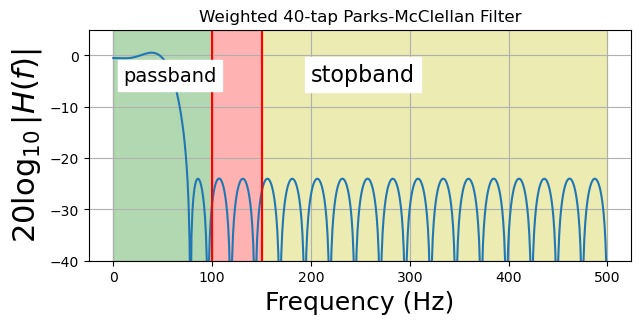

In [20]:
#5.12
fs = 1e3 # sample rate in Hz
M = 40
fpass = 100 # in Hz
fstop = 150 # in Hz
hn = signal.remez(M,
                 np.array([0, fpass, fstop, fs])/2., # scaled passband, and stop band 
                 [1,0],  # low pass filter
                 Hz = fs, # sampling frequency
                 )

w,H=signal.freqz(hn,1) # frequency response
fig,ax = plt.subplots()
fig.set_size_inches((7,3))
apply_plot_overlay()
ax.set_title('Weighted %d-tap Parks-McClellan Filter'%M)

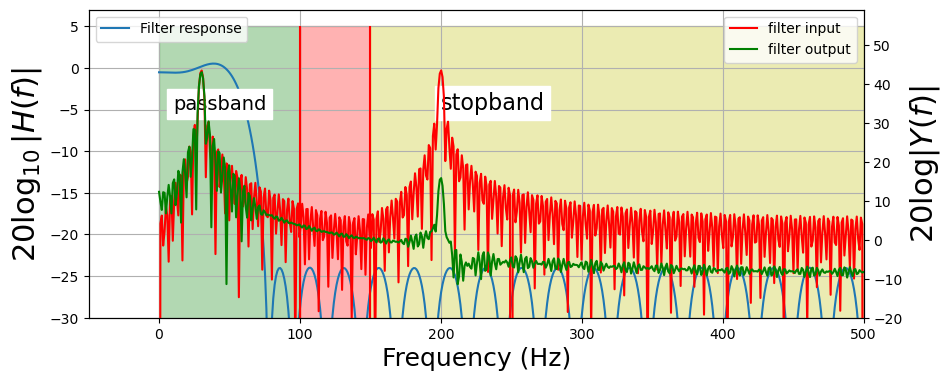

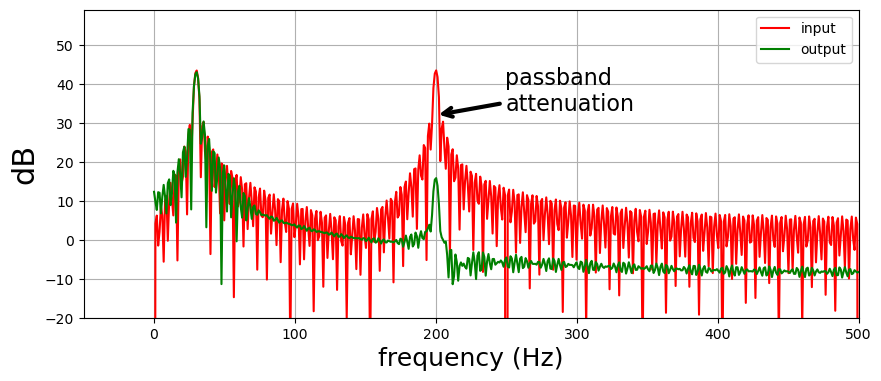

In [21]:
#5.13
import numpy as np
import matplotlib.pyplot as plt
from __future__ import  division
from matplotlib.patches import Rectangle
from scipy import signal
Ns =300 # number of samples 
N = 1024 # DFT size
t = np.arange(0,Ns)/fs
fs = 1e3
x = np.cos(2*np.pi*30*t)+np.cos(2*np.pi*200*t)
#x = x*signal.hamming(Ns) # try windowing also!
X = np.fft.fft(x,N)

y=signal.lfilter(hn,1,x)
Y = np.fft.fft(y,N)

fig,ax = plt.subplots()
fig.set_size_inches((10,4))
apply_plot_overlay()
ax.set_ylim(ymin=-30,ymax=7)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(np.arange(N)/N*fs,20*np.log10(abs(X)),'r-',label='filter input')
ax2.plot(np.arange(N)/N*fs,20*np.log10(abs(Y)),'g-',label='filter output')
#ax2.plot(np.arange(N)/N*fs,20*np.log10(abs(X)*abs(H)),'g:',lw=2.,label='YY')
ax2.set_xlim(xmax = fs/2)
ax2.set_ylim(ymin=-20)
ax2.set_ylabel(r'$20\log|Y(f)|$',fontsize=22)
ax2.legend(loc=0);

fig,ax = plt.subplots()
fig.set_size_inches((10,4))
ax.plot(np.arange(N)/N*fs,20*np.log10(abs(X)),'r-',label='input')
ax.plot(np.arange(N)/N*fs,20*np.log10(abs(Y)),'g-',label='output')
ax.set_xlim(xmax = fs/2)
ax.set_ylim(ymin=-20)
ax.set_ylabel(r'dB',fontsize=22)
ax.set_xlabel("frequency (Hz)",fontsize=18)
ax.grid()
ax.annotate('passband\nattenuation',fontsize=16,xy=(200,32),
             xytext=(50,3),textcoords='offset points',
             arrowprops=dict(arrowstyle='->',lw=3),
            )
ax.legend(loc=0);

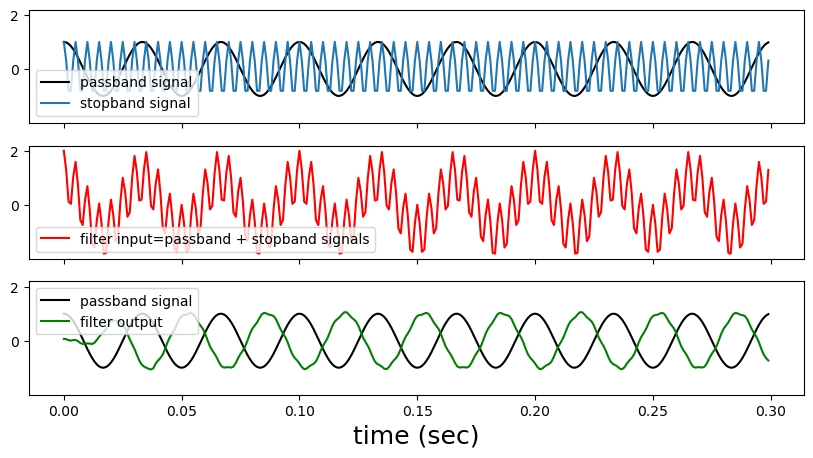

In [22]:
#5.14
Ns =300 # number of samples
N = 1024 # DFT size
t = np.arange(0,Ns)/fs
x_pass = np.cos(2*np.pi*30*t) # passband signal
x_stop = np.cos(2*np.pi*200*t) # stopband signal
x = x_pass + x_stop
y=signal.lfilter(hn,1,x)

fig,axs = plt.subplots(3,1,sharey=True,sharex=True)
fig.set_size_inches((10,5))

ax=axs[0]
ax.plot(t,x_pass,label='passband signal',color='k')
ax.plot(t,x_stop,label='stopband signal')
ax.legend(loc=0)

ax=axs[1]
ax.plot(t,x,label='filter input=passband + stopband signals',color='r')
ax.legend(loc=0)

ax=axs[2]
ax.plot(t,x_pass,label='passband signal',color='k')
ax.plot(t,y,label='filter output',color='g')
ax.set_xlabel("time (sec)",fontsize=18)
ax.legend(loc=0);